In [1]:
from faker import Faker
import random
import pandas as pd
from random import randrange
from datetime import datetime
import numpy as np

In [2]:
nr_of_trekkers = 10000
# time-stamp
# email, name, height, weight, age, gender, city, locality
# languages, college
# working profession, have you gone trekking
# preference of trek days
# no. of previous treks
# list of treks done
# difficulty of trek
# preferred location of trek
# food preferences

fake = Faker('de_DE')

trekkers = []

In [3]:
# generate a list of ages between 18 and 80 years old, with 1000 entries following a normal distribution
ages = np.random.normal(30, 10, nr_of_trekkers).astype(int)
# generate a list of number of previous treks between 0 and 10, with 1000 entries following a normal distribution
previous_treks = np.random.normal(3, 1, nr_of_trekkers).astype(int)

for customers_id in range(nr_of_trekkers):
    # creating time-stamp:
    d1 = datetime.strptime(f'1/1/2021', '%m/%d/%Y')
    d2 = datetime.strptime(f'12/31/2022', '%m/%d/%Y')
    transaction_date = fake.date_between(d1, d2)
    # create email:
    email = fake.ascii_email()
    # create trekkers name:
    name = fake.name()

    # create height:
    height = fake.random_int(160, 199)
    # create weight:
    weight = fake.random_int(50, 110)

    # create age:
    age = ages[customers_id]
    if age < 10:
        age = 30-age
    
    # create gender:
    gender = random.choice(["M", "F", "None"])
    # create city:
    city = random.choice(["Pune", "Mumbai", "Nashik", "Kolhapur", "Nagpur"])
    # create locality:
    locality = random.choice(["Sky-One", "Krishna Kamal", "Midori Towers", "24K-KPS", "Krishna Park", "Evergreen Society"])
    # choose max 3 min 1 languages
    languages = random.sample(["English", "Hindi", "Marathi", "Gujarati", "Bengali","Urdu"], k=random.randint(1, 3))
    # create college:
    college = random.choice(["MIT-WPU", "SPPU", "MIT-ADT", "PCCOE", "PICT", "VIT"])
    # create profession:
    profession = random.choice(["accountant","actor","air traffic controller","architect","artist","attorney","banker",
                                    "bartender","barber","bookkeeper","builder","businessman","businessperson","butcher","carpenter",
                              "cashier","chef","coach","dental hygienist","dentist","designer","developer","dietician","doctor","economist","editor",
                              "electrician","engineer","farmer","fisherman","flight attendant","jeweler","judge","lawyer","mechanic",
                              "musician","nutritionist","nurse","optician","painter","pharmacist","photographer","physician","pilot",
                              "plumber","policeofficer",  "politician","professor","programmer","psychologist","receptionist","salesman",
                              "salesperson","secretary","singer","surgeon""teacher","therapist","translator","translator","undertaker",
                              "veterinarian","videographer","waiter","writer","Professors","Teachers","Actors","Clergy","Musicians",
                              "Philosophers","Visual Artists","Writers","Audiologists","Chiropractors","Dentists","Dietitians","Doctors",
                              "Medical Laboratory Scientists","Midwives","Nurses","Occupationaltherapists","Optometrists","Pathologists",
                              "Pharmacists","Physicaltherapists","Physicians","Psychologists","Speechlanguagepathologists","Accountants",
                              "Actuaries","Agriculturists","Architects","Economists","Engineers","Interpreters","Attorney","Advocates",
                              "Solicitors","Librarians","Statisticians","Surveyors","Urbanplanners","Humanresources","Firefighters","Judges",
                              "Militaryofficers","Policeofficers","Airtrafficcontrollers","Aircraftpilots","Seacaptains","Scientists",
                              "Astronomers","Biologists","Botanists","Ecologists","Geneticists","Immunologists","Pharmacologists","Virologists",
                              "Zoologists","Chemists","Geologists","Meteorologists","Oceanographers","Physicists","Programmers","Webdevelopers",
                              "Designers","Graphicdesigners","Webdesigners","Physicians","surgeons","Dentists","Veterinarians","Pharmacists",
                              "Chiropractors","Osteopaths","Optometrists","Opticians","RegisteredNurses","Licensedpracticalnurses","Dieticians",
                              "Physicaltherapists","Occupationaltherapists","Dentalhygienists","Clinicallabtechnicians","EMTspecialist","Speechpathologists",
                              "Physicianassistants","Paramedics"])
    # create YES/NO:
    # create preference of trek days:
    gone_trekking = random.choice(["Y", "N"])
    if gone_trekking == "Y":
        num_treks = previous_treks[customers_id]
    else:
        num_treks = 0

    # preference of trek days monday to sunday, min 1 max 7
    preferred_days = random.sample(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], k=random.randint(1, 7))
    # list of treks done:
   # prev_treks = random.choice()
    # difficulty of treks:
    difficulty_trek = random.choice(["Beginner", "Intermediate", "Experienced"])
    # preferred location of treks:

    # food choice:
    food_choice = random.choice(["Non-Veg", "Veg", "Vegan"])


    trekkers.append([email, name, height, weight,age, gender, city, locality, languages, college, profession,
                     gone_trekking, preferred_days, num_treks, difficulty_trek])




In [4]:

trekkers_df = pd.DataFrame(trekkers, columns=['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City', 'Locality',
                                               'Languages', 'college', 'Profession', 'Have you gone Trekking', 'Preferred Days',
                                               'Number of Treks', 'Difficulty of Trek'])

pd.pandas.set_option('display.max_columns', None)
print(trekkers_df)

                            Email-ID                      Name  Height  \
0           antoniogude@heydrich.org        Cynthia Säuberlich     171   
1                constantin43@aol.de             Freddy Pechel     176   
2     frankeklaus-guenter@textor.com  Karl-Werner Hering B.Sc.     182   
3         killertraude@paertzelt.com    Heiner Lachmann B.Eng.     193   
4               hethursalih@thies.de    Ernst-Dieter Rose MBA.     181   
...                              ...                       ...     ...   
9995            josefine50@gmail.com     Dr. Christian Wieloch     165   
9996          qfoerster@beckmann.com               Hulda Wende     163   
9997              ludwig56@gmail.com          Aloisia Hoffmann     190   
9998                   yriehl@gmx.de             Nina Schleich     187   
9999         draganjunken@bender.com            Ferdinand Graf     198   

      Weight  Age Gender      City           Locality  \
0         87   18      F    Nagpur            Sky-One 

<AxesSubplot:>

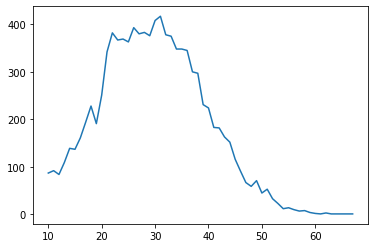

In [5]:
trekkers_df["Age"].value_counts().sort_index().plot(kind="line")

In [6]:
trekkers_df.describe()

,Height,Weight,Age,Number of Treks
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,179.644300,79.925400,29.659600,1.237600
std,11.548667,17.508566,9.394315,1.453533
min,160.000000,50.000000,10.000000,0.000000
25%,170.000000,65.000000,23.000000,0.000000
50%,180.000000,80.000000,29.000000,0.000000
75%,190.000000,95.000000,36.000000,3.000000
max,199.000000,110.000000,67.000000,6.000000


In [7]:
trekkers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email-ID                10000 non-null  object
 1   Name                    10000 non-null  object
 2   Height                  10000 non-null  int64 
 3   Weight                  10000 non-null  int64 
 4   Age                     10000 non-null  int64 
 5   Gender                  10000 non-null  object
 6   City                    10000 non-null  object
 7   Locality                10000 non-null  object
 8   Languages               10000 non-null  object
 9   college                 10000 non-null  object
 10  Profession              10000 non-null  object
 11  Have you gone Trekking  10000 non-null  object
 12  Preferred Days          10000 non-null  object
 13  Number of Treks         10000 non-null  int64 
 14  Difficulty of Trek      10000 non-null  object
dtypes: 

In [8]:
trekkers_df.to_csv('../Data/trekkers_df.csv', index=False)